In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# Colormaps

Cuando deseamos representar regiones, pero no existe ningún tipo de relación entre regiones un mapa de colores de tipo cualitativo es la mejor opción. 

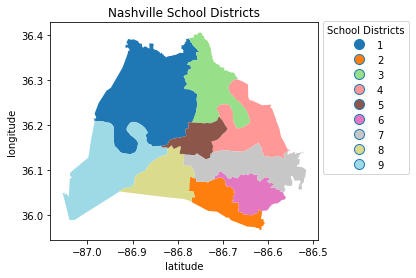

In [46]:
#Lectura de datos 
districts = gpd.read_file('school_districts.geojson')

#Agregamos el estilo de leyenda 
legend_kwds = {'title' : 'School Districts',
              'loc' : 'upper left',
              'bbox_to_anchor' : (1, 1.03),
              'ncol' : 1}

#Nos creamos el plot
data.plot(column = 'district', cmap = 'tab20', legend = True, legend_kwds = legend_kwds)
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.title('Nashville School Districts')
plt.show()

# Map Nashville neighborhoods

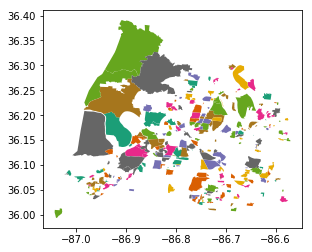

In [47]:
#Cargamos los datos
neighborhoods = gpd.read_file('neighborhoods.geojson')

#Nos creamos el plot
neighborhoods.plot(column = 'name', cmap = 'Dark2')

#Vemos el resultado
plt.show()

# Changing coordinate reference systems

Podemos cambiar las coordenadas de referencia de nuestro geoJson, para ello contamos con la función **to_crs()** que nos permite cambiar dicho parámetro.

In [48]:
districts.geometry = districts.geometry.to_crs(epsg = 4326)

# Construct a GeoDataFrame from a DataFrame

In [17]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

#Cargamos los datos
df = pd.read_csv('public_art.csv')

#Nos creamos nuestra nueva columna aplicando el cambio
df['geometry'] = df.apply(lambda x : Point(float(x.Longitude), float(x.Latitude)), axis = 1)

#Nos creamos nuestro GeoDataFrame
art_geo = gpd.GeoDataFrame(df, crs = data.crs, geometry = df.geometry)

In [18]:
print(type(art_geo))

<class 'geopandas.geodataframe.GeoDataFrame'>


# Spatial join practice

A continuación vamos a hacer uso de la función **sjoin()** que nos permite realizar join para este tipo de datos.

In [49]:
#Veamos si los dos polígonos intersecan entre si
intersect = gpd.sjoin(art_geo, neighborhoods, op = 'intersects')
intersect.shape

/home/francisco/anaconda3/lib/python3.6/site-packages/geopandas/tools/sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


(40, 13)

In [50]:
#La opción within chequea si un punto se encuentra dentro de un polígono
within = gpd.sjoin(art_geo, neighborhoods, op = 'within')
within.shape

/home/francisco/anaconda3/lib/python3.6/site-packages/geopandas/tools/sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


(40, 13)

In [51]:
#La opción contains chequea sin un polígono contiene un punto
contain = gpd.sjoin(art_geo, neighborhoods, op = 'contains')
contain.shape

/home/francisco/anaconda3/lib/python3.6/site-packages/geopandas/tools/sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


(0, 13)

# Finding the neighborhood with the most public art

In [52]:
within_neighborhood = gpd.sjoin(art_geo, neighborhoods, op = 'within')
print(within_neighborhood.head())

                                Title Last Name First Name  \
1     [Fourth and Commerce Sculpture]    Walker        Lin   
4                A Story of Nashville    Ridley       Greg   
21                        Chet Atkins     Faxon    Russell   
22  Children's Chairs For The Seasons    McGraw     Deloss   
34                    Foliated Scroll   Bloomer       Kent   

                                             Location  \
1                   333 Commerce Street, Nashville TN   
4                     615 Church Street, Nashville TN   
21  Corner of Fifth Avenue North and Union Street,...   
22                    615 Church Street, Nashville TN   
34                    615 Church Street, Nashville TN   

                                         Medium       Type  \
1                                           NaN  Sculpture   
4                      Hammered copper repousse     Frieze   
21  Bronze stool and guitar on a granite plynth  Sculpture   
22                 Mixed Media - woo

/home/francisco/anaconda3/lib/python3.6/site-packages/geopandas/tools/sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


# Aggregating points within polygons

In [37]:
#Agrupamos por la columna name
within_neighborhood_grouped = within_neighborhood[['name', 'Title']].groupby('name')

#Agregamos
print(within_neighborhood_grouped.agg('count').sort_values(by = 'Title', ascending = False))

                          Title
name                           
Urban Residents              22
Lockeland Springs             3
Edgehill (ONE)                2
Germantown                    2
Hillsboro-West End            2
Inglewood                     2
Sunnyside                     2
Chestnut Hill (TAG)           1
Historic Edgefield            1
McFerrin Park                 1
Renraw                        1
Wedgewood Houston (SNAP)      1


# Plotting the Urban Residents neighborhood and art

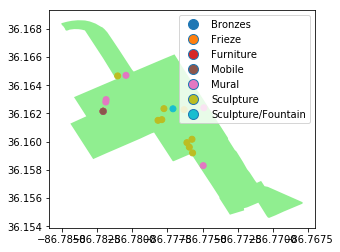

In [45]:
#Filtramos los Urban Residents
urban_art = within_neighborhood.loc[within_neighborhood.name == 'Urban Residents']

urban_polygon = neighborhoods.loc[neighborhoods.name == 'Urban Residents']

ax = urban_polygon.plot(color = 'lightgreen')

urban_art.plot(ax = ax, column = 'Type', legend = True)
plt.show()